In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Movie_classification.csv",header=0)

In [5]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Missing Value Imputation

In [7]:
df["Time_taken"].mean()

157.39149797570855

In [8]:
df["Time_taken"].fillna(value=df["Time_taken"].mean(),inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy Variable Creation

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [11]:
df = pd.get_dummies(df,columns=["3D_available","Genre"],drop_first=True)

## X-y split

In [12]:
x = df.loc[:,df.columns!="Start_Tech_Oscar"]

In [13]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [14]:
x.shape

(506, 20)

In [15]:
y = df["Start_Tech_Oscar"]

In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [17]:
y.shape

(506,)

## Test-Train split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2,random_state = 0)

In [20]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [21]:
x_train.shape

(404, 20)

In [22]:
x_test.shape

(102, 20)

## Training Classification Tree

In [23]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [24]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Predict values using trained model

In [25]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [26]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## ModelPerformance

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [29]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [30]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

## Plotting decision tree

In [31]:
dot_data = tree.export_graphviz(clftree,out_file=None,feature_names=x_train.columns,filled=True)

In [32]:
from IPython.display import Image

In [33]:
import pydotplus

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data)

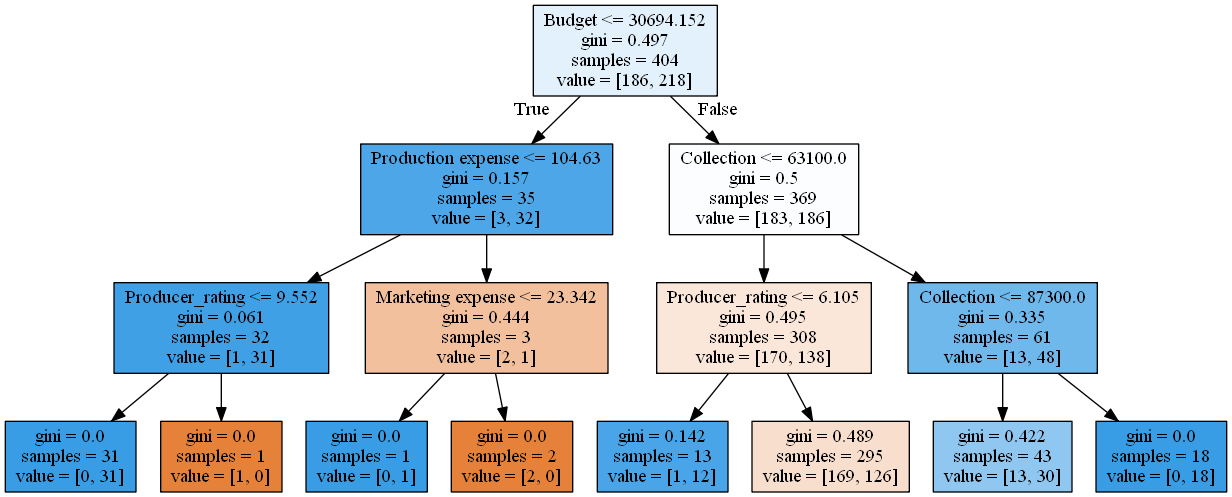

In [35]:
Image(graph.create_png())

## Controlling tree growth

In [36]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf= 20 , max_depth=4)

In [37]:
clftree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [38]:
dot_data = tree.export_graphviz(clftree2,out_file=None,feature_names=x_train.columns,filled=True)

In [39]:
graph2 = pydotplus.graph_from_dot_data(dot_data)

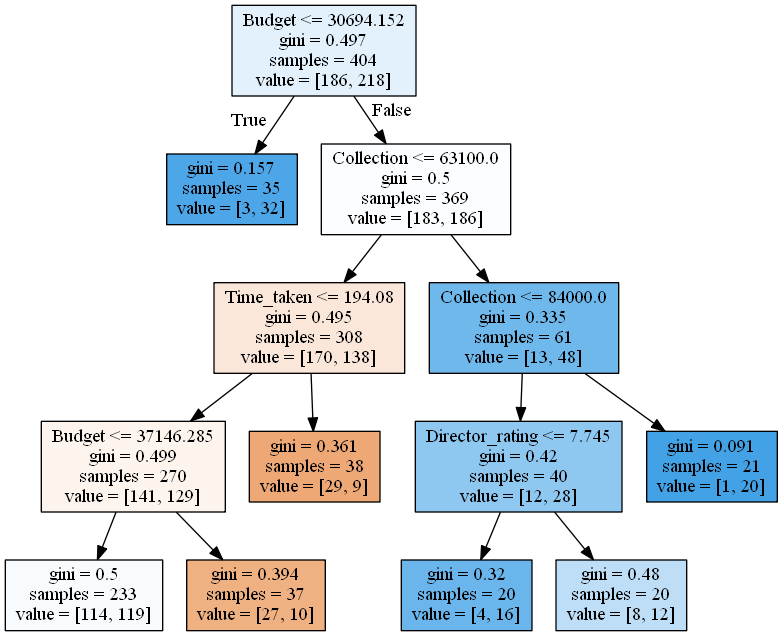

In [40]:
Image(graph2.create_png())

In [41]:
accuracy_score(y_test,clftree2.predict(x_test))

0.5588235294117647

## Bagging

In [42]:
clftree3 = tree.DecisionTreeClassifier()

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bag_clf = BaggingClassifier(base_estimator=clftree3,
                            n_estimators=1000,
                            bootstrap=True,
                            n_jobs=-  1,
                            random_state=42)

In [45]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [46]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [47]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6176470588235294

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1,random_state=42)

In [50]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [51]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [52]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6372549019607843

   ## Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [55]:
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split":[2,3,10]}

In [56]:
grid_search = GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,scoring="accuracy")

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [58]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [59]:
cvrf_clf = grid_search.best_estimator_

In [60]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

In [61]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[25, 19],
       [19, 39]], dtype=int64)

## Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc_clf = GradientBoostingClassifier()

In [64]:
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [65]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.5882352941176471

In [66]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [67]:
gbc_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [68]:
accuracy_score(y_train,gbc_clf2.predict(x_train))

0.7623762376237624

In [69]:
accuracy_score(y_test,gbc_clf2.predict(x_test))

0.6176470588235294

## Ada Boost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada_clf = AdaBoostClassifier(learning_rate=.02,n_estimators=5000)

In [77]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [78]:
accuracy_score(y_train,ada_clf.predict(x_train))

0.8886138613861386

In [79]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.6274509803921569

In [83]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate=.05,n_estimators=500)

In [84]:
ada_clf2.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [85]:
accuracy_score(y_test,ada_clf2.predict(x_test))

0.6470588235294118

## XG Boost

In [86]:
import xgboost as xgb

#### Parameter tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [90]:
xgb_clf = xgb.XGBClassifier(max_depth =5 ,n_estimators=10000,learning_rate = 0.3,n_jobs=-1)

In [91]:
 xgb_clf.fit(x_train,y_train)

C:\Users\Joskar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [93]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

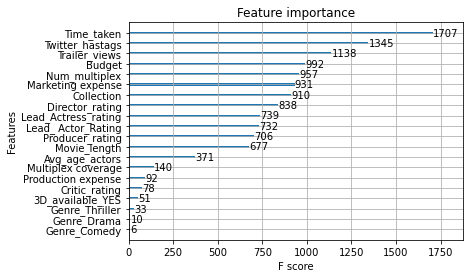

In [94]:
xgb.plot_importance(xgb_clf)

In [104]:
xgb_clf = xgb.XGBClassifier(n_esmators=250,learning_rate=.1,random_state=42)

In [109]:
param_test1 ={
    "max_depth": range(3,10,2),
    "gamma":[.1,.2,.3],
    "subsample":[.8,.9],
    "colsample_bytree":[.8,.9],
"reg_alpha":[.01,.1,1]}

In [110]:
grid_search = GridSearchCV(xgb_clf,param_test1,n_jobs=-1,cv=5,scoring="accuracy")

In [111]:
grid_search.fit(x_train,y_train)

[13:46:43] WARNING: ..\src\learner.cc:541: 
Parameters: { n_esmators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:46:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Joskar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esmators=250, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree

In [113]:
cvxg_clf = grid_search.best_estimator_

In [114]:
accuracy_score(y_test,cvxg_clf.predict(x_test))

0.6176470588235294

In [115]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 5,
 'reg_alpha': 0.01,
 'subsample': 0.8}